# Amostra de cães para análise
Esta análise não possui dados conclusivos, vendo que utiliza apenas um conjunto de dados pequeno, para aula de estatística.

In [30]:
# Imports e conjunto de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_dog = pd.read_excel('variaveis.xlsx')

In [31]:
# Verificação do conjunto de dados
df_dog.head()

,Sexo,Raça,peso em Kg,idade,qtd vacinas,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,M,pinscher,7.5,12.0,1,F,24.0,NaN,17 RAÇÃS
2,M,rottweiller,12.0,7.0,0,M,26.0,NaN,NaN
3,F,pastor alemão,3.0,10.0,0,NaN,NaN,pinscher,3
4,F,pug,2.0,1.0,3,NaN,NaN,rottweiller,4
5,F,maltês,1.5,0.6,1,NaN,NaN,pastor alemão,3


### Limpeza do conjunto de dados

In [32]:
df_dog.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [33]:
df_dog.head()

,Sexo,Raça,peso em Kg,idade,qtd vacinas
1,M,pinscher,7.5,12.0,1
2,M,rottweiller,12.0,7.0,0
3,F,pastor alemão,3.0,10.0,0
4,F,pug,2.0,1.0,3
5,F,maltês,1.5,0.6,1


In [34]:
# Corerção das colunas
df_dog.rename(columns= lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [35]:
df_dog.head()

,sexo,raça,peso_em_kg,idade,qtd_vacinas
1,M,pinscher,7.5,12.0,1
2,M,rottweiller,12.0,7.0,0
3,F,pastor alemão,3.0,10.0,0
4,F,pug,2.0,1.0,3
5,F,maltês,1.5,0.6,1


In [36]:
# Verificando valores vazios
df_dog.isnull().sum()

sexo           0
raça           0
peso_em_kg     0
idade          0
qtd_vacinas    0
dtype: int64

# Questões importantes para análise da amostra
- Qual o sexo mais aparente na amostra?
- Qual raça tem maior parcela na amostra?
- Quais raças estão acima da idade mediana?
- Qual porte mais aparente na amostra?
- Quantos porcento da amostra de cães não está devidamente vacinados?

In [37]:
# Valores de machos e femeas do conjunto
sexo = df_dog['sexo'].value_counts()
sexo

M    26
F    24
Name: sexo, dtype: int64

In [38]:
size_sexo = df_dog['sexo'].count()

In [39]:
labels = ['Macho', 'Femea']
sizes = [(sexo[0]/size_sexo)*100, (sexo[1]/size_sexo)*100]
colors = ['Blue', 'Red']

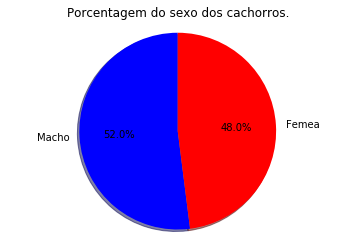

In [40]:
# Passando os paramêtros para geração do gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Porcentagem do sexo dos cachorros.')
plt.show();

São mais aparentes cães machos na amostra

In [41]:
# Quantia por raça
racas = df_dog['raça'].value_counts()
# Valor total de registros em raças
raca_size = df_dog['raça'].count()
# Exibindo quantia por raça
racas

pug              9
boxer            6
rottweiller      4
poodlle          4
pastor alemão    3
bulldog          3
fox p            3
pequines         3
pinscher         3
maltês           2
chihuauhua       2
yourkshire       2
beagle           2
cocker           1
salsicha         1
shihtsu          1
cão pelado       1
Name: raça, dtype: int64

In [42]:
# Criando as labels para o gráfico
labels = [raca.title() for raca in racas.index]
# Determinando a porcentagem de cada um deles
sizes = [(value/raca_size)*100 for value in racas.values]

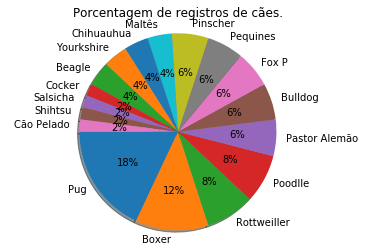

In [43]:
# Gerando o gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=180)
ax1.axis('equal')
plt.title('Porcentagem de registros de cães.')
plt.show();

A raça com maior parcela na amostra é o Pug, sendo 18% da amostra.

In [44]:
# Recebendo mediana
mediana = df_dog['idade'].median()

In [45]:
# Selecionando apenas as raças com idade acima da mediana
acima = df_dog.query('idade >= @mediana')

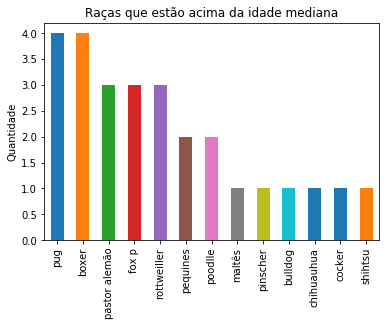

In [46]:
# Gerando gráfico
acima['raça'].value_counts().plot(kind='bar', title='Raças que estão acima da idade mediana')
plt.ylabel('Quantidade');

Estas são as raças e a quantidade de vezes em que aparecem acima da idade mediana.

In [47]:
intevalos = [0, 6, 15, 25, 45, 60]
rotulos = ['Mini', 'Pequeno', 'Médio', 'Grande', 'Gigante']

In [48]:
# Criando uma nova coluna e inserido os rótulos de acordo com os intervalos
df_dog['porte'] = pd.cut(df_dog['peso_em_kg'], intevalos, labels=rotulos)

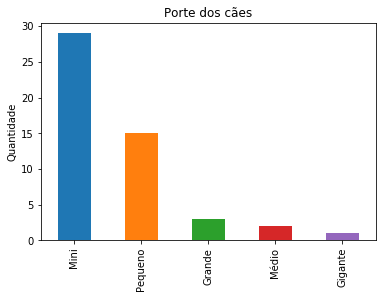

In [49]:
# Geração de um gráfico de barras com a quantidade por porte dos cães
df_dog['porte'].value_counts().plot(kind='bar',title='Porte dos cães');
plt.ylabel('Quantidade');

Na maioria dos registros temos cães de porte Mini.

In [50]:
total = df_dog['qtd_vacinas'].count()
sem_vacina = df_dog['qtd_vacinas'].value_counts()[0]
resto = total - sem_vacina

In [51]:
labels = ['Não Vacinados', 'Vacinados']
sizes = [(sem_vacina/total)*100, (resto/total)*100]
explode = (0.1, 0)

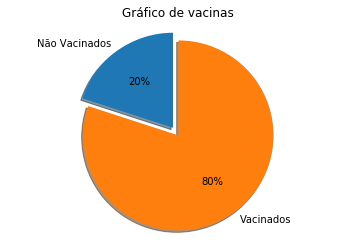

In [52]:
# Gerando o gráfico
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Gráfico de vacinas')
plt.show();

20% dos cães não são devidamente vacidos.